# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
#List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

649


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#API Info

url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
#Loop through the randomly selected cities in the CSV file and get the weather data
city_name = []
id_number = []
lat = []
lon = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []

cities_weather = []

for city in cities:  #[0:10]
    try: 
        weather_response = requests.get(query_url + city)
        weather_json = weather_response.json()
        time.sleep(1)
        city_name = (weather_json['name'])
        id_number = (weather_json['id'])
        lat = (weather_json["coord"]["lat"])
        lon = (weather_json["coord"]["lon"])
        max_temp = (weather_json["main"]["temp_max"])
        humidity = (weather_json["main"]["humidity"])
        clouds = (weather_json["clouds"]["all"])
        wind_speed = (weather_json["wind"]["speed"])
        country = (weather_json["sys"]["country"])
        date = (weather_json["dt"])
        cities_weather.append({"City Name": city_name,
                  "Lat": lat,
                  "Lon": lon,
                  "Max Temp": max_temp,
                  "Humidity": humidity,
                  "Cloudiness": clouds,
                  "Wind Speed": wind_speed,
                  "Country": country,
                  "Date": date})
                
        print(f"City ID and City Name: {id_number} {city_name}")
        
    except:
        print("Keyerror ignore")
        pass

City ID and City Name: 5880054 Barrow
City ID and City Name: 2381334 Atar
City ID and City Name: 3395981 Maceió
City ID and City Name: 1271439 Gaya
City ID and City Name: 3464274 Encantado
City ID and City Name: 3421193 Paamiut
City ID and City Name: 2618795 Klaksvík
City ID and City Name: 6201424 Mataura
City ID and City Name: 2163355 Hobart
City ID and City Name: 3369157 Cape Town
City ID and City Name: 4030556 Rikitea
City ID and City Name: 3883457 Lebu
City ID and City Name: 172515 Abu Samrah
City ID and City Name: 5848280 Kapaa
City ID and City Name: 5856516 ‘Āhuimanu
City ID and City Name: 286621 Salalah
City ID and City Name: 3874787 Punta Arenas
City ID and City Name: 296852 Erzin
City ID and City Name: 2121385 Severo-Kuril'sk
City ID and City Name: 1015776 Bredasdorp
City ID and City Name: 3526756 Isla Mujeres
City ID and City Name: 3459785 João Pinheiro
City ID and City Name: 3833367 Ushuaia
City ID and City Name: 2038067 Chifeng
City ID and City Name: 2027244 Bagdarin
City I

City ID and City Name: 2409914 Bonthe
City ID and City Name: 1295765 Sittwe
City ID and City Name: 1791464 Wenling
City ID and City Name: 1337617 Muli
City ID and City Name: 229268 Mbarara
City ID and City Name: 686090 Asău
City ID and City Name: 1726449 Basco
City ID and City Name: 3374333 Praia
City ID and City Name: 3585968 El Salvador
City ID and City Name: 935215 Saint-Philippe
City ID and City Name: 6620339 Karratha
City ID and City Name: 1259385 Port Blair
City ID and City Name: 2030065 Mandalgovi
City ID and City Name: 2126682 Bilibino
City ID and City Name: 3617459 Nueva Guinea
Keyerror ignore
City ID and City Name: 2171465 Clarence Town
City ID and City Name: 4764826 Hopewell
City ID and City Name: 3994469 Ojinaga
City ID and City Name: 2418764 Koubia
City ID and City Name: 780687 Berlevåg
City ID and City Name: 1060283 Maroantsetra
City ID and City Name: 3430443 Necochea
City ID and City Name: 2264557 Ponta do Sol
Keyerror ignore
City ID and City Name: 104515 Makkah al Mukar

City ID and City Name: 2014718 Tynda
City ID and City Name: 621754 Slonim
City ID and City Name: 2270385 Camacha
City ID and City Name: 3036364 Aubière
City ID and City Name: 3881102 Machalí
City ID and City Name: 1524325 Ekibastuz
City ID and City Name: 534015 Losino-Petrovskiy
City ID and City Name: 5836068 Rawlins
City ID and City Name: 4033077 Vaitape
City ID and City Name: 5870133 Nome
City ID and City Name: 2640006 Portree
City ID and City Name: 3372964 Lagoa
City ID and City Name: 1863978 Nishifukuma
City ID and City Name: 2082539 Merauke
City ID and City Name: 6316343 Alta Floresta
City ID and City Name: 4392354 Jasper
City ID and City Name: 2122605 Okhotsk
City ID and City Name: 2129766 Kamiiso
City ID and City Name: 2738381 Lata
City ID and City Name: 1855342 Nishihara
City ID and City Name: 2168305 Dubbo
City ID and City Name: 2643044 Margate
City ID and City Name: 1023309 Aliwal North
City ID and City Name: 2022083 Alekseyevsk
City ID and City Name: 2063042 Port Hedland
Cit

City ID and City Name: 1024552 Xai-Xai
City ID and City Name: 2349276 Asaba
City ID and City Name: 553766 Kamenka
City ID and City Name: 2070998 Geraldton


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create a dataframe from the weather info

cities_weather_df = pd.DataFrame(cities_weather)
cities_weather_df

,City Name,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,30.22,74,90,9.22,US,1633801668
1,Atar,20.5169,-13.0499,99.61,10,99,11.45,MR,1633801670
2,Maceió,-9.6658,-35.7353,87.24,58,20,11.50,BR,1633801437
3,Gaya,24.7833,85.0000,78.71,94,5,0.00,IN,1633801672
4,Encantado,-29.2361,-51.8697,71.65,91,100,2.64,BR,1633801674
...,...,...,...,...,...,...,...,...,...
589,Pandan,14.0453,124.1694,80.55,89,99,16.98,PH,1633802579
590,Xai-Xai,-25.0519,33.6442,80.13,51,0,11.54,MZ,1633802580
591,Asaba,6.2006,6.7338,76.32,94,97,6.55,NG,1633802581
592,Kamenka,51.3223,42.7678,43.56,60,3,6.02,RU,1633802583


In [6]:
cities_weather_df.to_csv("../cities_weather.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#Find humidity greater than 100%
high_humidity = cities_weather_df.loc[cities_weather_df["Humidity"] > 100]
high_humidity


,City Name,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
#There are no cities with humidity greater than 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

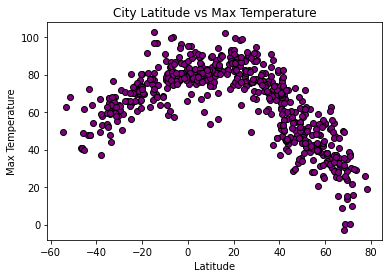

In [9]:
x_values = cities_weather_df["Lat"]
y_values = cities_weather_df["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs Max Temperature")
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", edgecolors="black")
plt.savefig("../Temp_plot.png")
plt.show()

In [10]:
#The data is showing the relationship between the latitude of each city and the max temperature of each city.
#Conclusion #1:
    #The closer the city is to latitude 0 or to the equater the higher the max temperatures.  Latitudes further away from 0
    #have a lower max temp.  This plot is showing the trend very well with few cities that deviate from the norm.

## Latitude vs. Humidity Plot

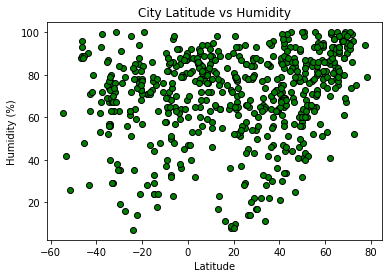

In [11]:
x_values = cities_weather_df["Lat"]
y_values = cities_weather_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.scatter(x_values, y_values, marker = "o", facecolors = "green", edgecolors="black")
plt.savefig("../Humidity_plot.png")
plt.show()

In [12]:
#The latitude vs humidity is showing how latitude could affect the humidity of the city.  There is a little bit of a trend
#in the this plot.
#Conclusion #2:
    #It seems like more cities in the northern hemisphere have higher humidity.  Also, the further the city is from the equater
    #the more humid it is.  This is not something I would have guessed.  I would think cities closer to the equater would have
    #higher humidity.

## Latitude vs. Cloudiness Plot

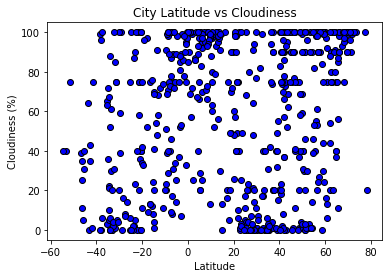

In [13]:
x_values = cities_weather_df["Lat"]
y_values = cities_weather_df["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.scatter(x_values, y_values, marker = "o", facecolors = "blue", edgecolors="black")
plt.savefig("../Cloudiness_plot.png")
plt.show()

In [14]:
#The latitude vs cloudiness plot shows how the latitude of a city could produce more or less percentage of clouds.
#Conclusion #3:
    #This info could vary greatly day by day and would be more useful if there was cumulative data collected throughout the year.
    #It might be better to see if latitude affected the cloudiness based on averge daily cloud cover for 1 year.

## Latitude vs. Wind Speed Plot

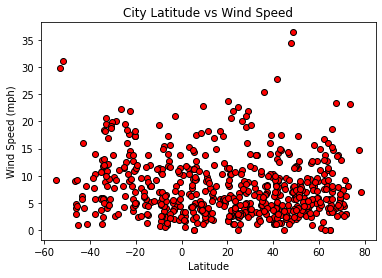

In [15]:
x_values = cities_weather_df["Lat"]
y_values = cities_weather_df["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")
plt.scatter(x_values, y_values, marker = "o", facecolors = "red", edgecolors="black")
plt.savefig("../Wind_speed_plot.png")
plt.show()

In [16]:
#Wind speed based on latitude - it seems like all of these, cities no matter the latitude,
#are falling into a wind speed range of 0 to 15 mph with very few of them with higher wind speeds.

## Linear Regression

In [17]:
#Dataframe for cities in northern hemisphere 
northern_cities = cities_weather_df.loc[cities_weather_df["Lat"] >= 0]
northern_cities

,City Name,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,30.22,74,90,9.22,US,1633801668
1,Atar,20.5169,-13.0499,99.61,10,99,11.45,MR,1633801670
3,Gaya,24.7833,85.0000,78.71,94,5,0.00,IN,1633801672
5,Paamiut,61.9940,-49.6678,35.08,41,20,1.41,GL,1633801675
6,Klaksvík,62.2266,-6.5890,50.92,85,44,16.75,FO,1633801677
...,...,...,...,...,...,...,...,...,...
587,Ulaangom,49.9811,92.0667,34.00,60,3,3.65,MN,1633802576
588,Concepción del Oro,24.6333,-101.4167,72.30,28,0,2.98,MX,1633802577
589,Pandan,14.0453,124.1694,80.55,89,99,16.98,PH,1633802579
591,Asaba,6.2006,6.7338,76.32,94,97,6.55,NG,1633802581


In [18]:
#Dataframe for cities in southern hemisphere 
southern_cities = cities_weather_df.loc[cities_weather_df["Lat"] < 0]
southern_cities

,City Name,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Maceió,-9.6658,-35.7353,87.24,58,20,11.50,BR,1633801437
4,Encantado,-29.2361,-51.8697,71.65,91,100,2.64,BR,1633801674
7,Mataura,-46.1927,168.8643,40.48,96,25,3.00,NZ,1633801678
8,Hobart,-42.8794,147.3294,48.06,71,35,16.11,AU,1633801527
9,Cape Town,-33.9258,18.4232,64.09,57,0,11.50,ZA,1633801681
...,...,...,...,...,...,...,...,...,...
576,Port Macquarie,-31.4333,152.9167,62.49,100,75,5.75,AU,1633802561
578,Dunedin,-45.8742,170.5036,48.79,88,5,4.32,NZ,1633802383
579,Mendi,-6.1761,143.6513,57.25,98,100,1.34,PG,1633802565
590,Xai-Xai,-25.0519,33.6442,80.13,51,0,11.54,MZ,1633802580


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7115815646441159


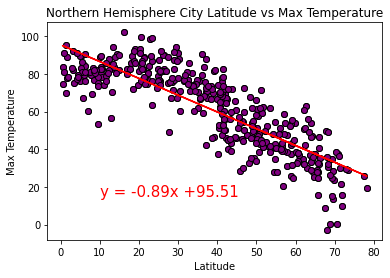

In [19]:
x_values = northern_cities["Lat"]
y_values = northern_cities["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere City Latitude vs Max Temperature")
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="purple", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere City Latitude vs Max Temperature")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")
plt.savefig("../Northern_temp_plot.png")

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5807392867070046


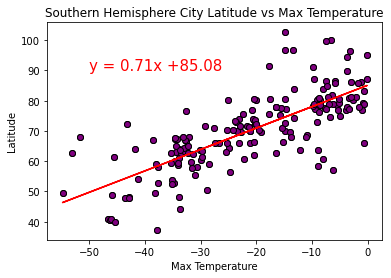

In [20]:
x_values = southern_cities["Lat"]
y_values = southern_cities["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Southern Hemisphere City Latitude vs Max Temperature")
plt.scatter(x_values, y_values, marker = "o", facecolors = "purple", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="purple", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Max Temperature")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere City Latitude vs Max Temperature")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.savefig("../Southern_temp_plot.png")

plt.show()



In [21]:
#The linear regression for latitude vs max temp is showing a negative correlation in the Northern Hemisphere
#and a positive correlation in the Southern hemisphere.
#As latitude increases in the norther hemisphere the max temp decreases and as latitude increases in the southern hemisphere
#the max temp increases
#If you had the latitude and longitue of a city outside of this list you could use the linear regression to find approximate
#max temp for that city

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04548987581822213


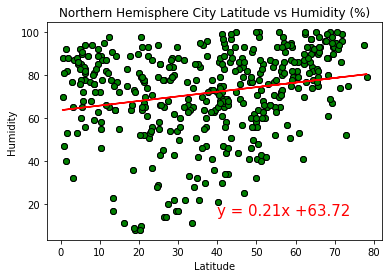

In [22]:
x_values = northern_cities["Lat"]
y_values = northern_cities["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere City Latitude vs Humidity (%)")
plt.scatter(x_values, y_values, marker = "o", facecolors = "green", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere City Latitude vs Humidity (%)")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.savefig("../Northern_humidity_plot.png")

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 8.479359020527601e-05


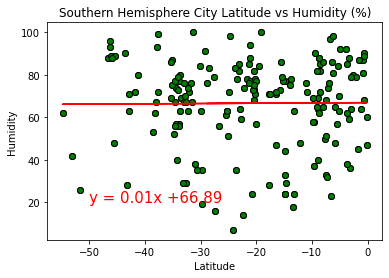

In [23]:
x_values = southern_cities["Lat"]
y_values = southern_cities["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere City Latitude vs Humidity")
plt.scatter(x_values, y_values, marker = "o", facecolors = "green", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="green", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere City Latitude vs Humidity (%)")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.savefig("../Southern_humidity_plot.png")

plt.show()



In [24]:
#The northern and southern hemispheres have positive correlations but it doesn't seem like there is much of a correlation in the 
#southern hemisphere.  There is potentially a correlation between humidity and latitude in the northern hemisphere but
#it is not very clear.  I think it could also depend on the time of year and what season each city is in.  
#The northern and southern hemispheres are in opposite seasons.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.002980025621697331


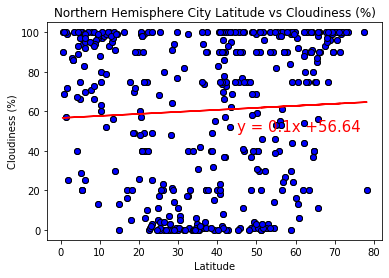

In [25]:
x_values = northern_cities["Lat"]
y_values = northern_cities["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere City Latitude vs Cloudiness (%)")
plt.scatter(x_values, y_values, marker = "o", facecolors = "blue", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere City Latitude vs Cloudiness (%)")
plt.annotate(line_eq,(45,50),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.savefig("../Northern_cloud_plot.png")


plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1331411502796976


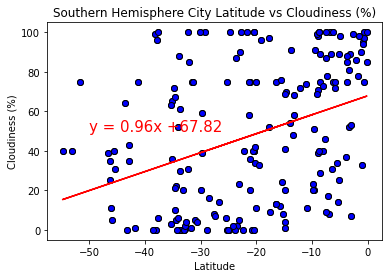

In [26]:
x_values = southern_cities["Lat"]
y_values = southern_cities["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere City Latitude vs Cloudiness")
plt.scatter(x_values, y_values, marker = "o", facecolors = "blue", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="blue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere City Latitude vs Cloudiness (%)")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.savefig("../Southern_cloud_plot.png")

plt.show()


In [27]:
#There is more of a positive correlation between latitude and cloudiness in the southern hemisphere.  The closer the city is
#to the equater the better the chance that it is going to be cloudy but in the northern hemisphere it is potentially cloudier
#going away from the equater.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 2.34197424429852e-06


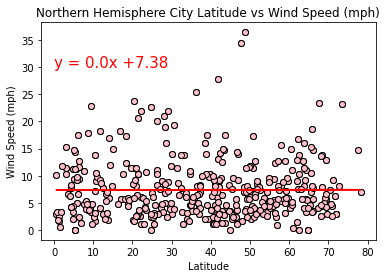

In [28]:
x_values = northern_cities["Lat"]
y_values = northern_cities["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere City Latitude vs Wind Speed (mph)")
plt.scatter(x_values, y_values, marker = "o", facecolors = "pink", edgecolors="black")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="pink", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere City Latitude vs Wind Speed (mph)")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.savefig("../Northern_wind_plot.png")


plt.show()




####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04381091613470958


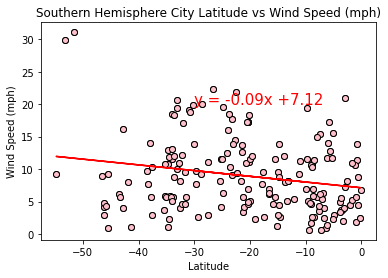

In [29]:
x_values = southern_cities["Lat"]
y_values = southern_cities["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere City Latitude vs Wind Speed (mph)")
plt.scatter(x_values, y_values, marker = "o", facecolors = "pink", edgecolors="black")
#plt.show()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values, marker = "o", facecolors="pink", edgecolors="black")
plt.plot(x_values,regress_values,"r-")


plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere City Latitude vs Wind Speed (mph)")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

plt.savefig("../Southern_wind_plot")


plt.show()




In [30]:
#The wind speeds seem to vary a little more in the southern hemisphere.  They could be higher further away from the equater and 
#the northern hemisphere is showing the same correlation but is not as clear as in the southern hemisphere.